<a href="https://colab.research.google.com/github/rahulsait/Projects/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# import required Python libraries

# to handle datasets
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [54]:
data = "/content/machine.data"

In [55]:
df = pd.read_csv(data, header=None)

In [56]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [57]:
df.shape

(209, 10)

In [58]:
print("Shape of the DataFrame is {}".format(df.shape))

Shape of the DataFrame is (209, 10)


In [59]:
col_names = ['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP']
df.columns = col_names

In [60]:
df.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [62]:

categorical = [col for col in df.columns if df[col].dtype == "O"]
print(categorical,"\n")
print("There are {} Categorical columns in the df ".format(len(categorical)))

['Vendor Name', 'Model Name'] 

There are 2 Categorical columns in the df 


In [63]:
df[categorical].head()

,Vendor Name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c


In [64]:
df['Vendor Name'].value_counts()

,count
Vendor Name,
ibm,32
nas,19
ncr,13
honeywell,13
sperry,13
siemens,12
amdahl,9
cdc,9
burroughs,8


In [65]:
print('Number of unique Model Names: ', len(df['Model Name'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  209
Number  of instances of models:  209


In [66]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)),"\n")
print("The Numerical Variables are :", numerical)

There are 8 numerical variables 

The Numerical Variables are : ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']


In [86]:
df[numerical].head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [89]:
df[numerical].corr()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3356,-0.3786,-0.3210,-0.3011,-0.2505,-0.3071,-0.2884
MMIN,-0.3356,1.0000,0.7582,0.5347,0.5172,0.2669,0.7949,0.8193
MMAX,-0.3786,0.7582,1.0000,0.5380,0.5605,0.5272,0.8630,0.9012
CACH,-0.3210,0.5347,0.5380,1.0000,0.5822,0.4878,0.6626,0.6486
CHMIN,-0.3011,0.5172,0.5605,0.5822,1.0000,0.5483,0.6089,0.6106
CHMAX,-0.2505,0.2669,0.5272,0.4878,0.5483,1.0000,0.6052,0.5922
PRP,-0.3071,0.7949,0.8630,0.6626,0.6089,0.6052,1.0000,0.9665
ERP,-0.2884,0.8193,0.9012,0.6486,0.6106,0.5922,0.9665,1.0000


In [92]:
corr_matrix = df[numerical].corr()
corr_matrix

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.0000,-0.3356,-0.3786,-0.3210,-0.3011,-0.2505,-0.3071,-0.2884
MMIN,-0.3356,1.0000,0.7582,0.5347,0.5172,0.2669,0.7949,0.8193
MMAX,-0.3786,0.7582,1.0000,0.5380,0.5605,0.5272,0.8630,0.9012
CACH,-0.3210,0.5347,0.5380,1.0000,0.5822,0.4878,0.6626,0.6486
CHMIN,-0.3011,0.5172,0.5605,0.5822,1.0000,0.5483,0.6089,0.6106
CHMAX,-0.2505,0.2669,0.5272,0.4878,0.5483,1.0000,0.6052,0.5922
PRP,-0.3071,0.7949,0.8630,0.6626,0.6089,0.6052,1.0000,0.9665
ERP,-0.2884,0.8193,0.9012,0.6486,0.6106,0.5922,0.9665,1.0000


In [94]:
corr_matrix['ERP'].sort_values(ascending=False)

,ERP
ERP,1.0000
PRP,0.9665
MMAX,0.9012
MMIN,0.8193
CACH,0.6486
CHMIN,0.6106
CHMAX,0.5922
MYCT,-0.2884


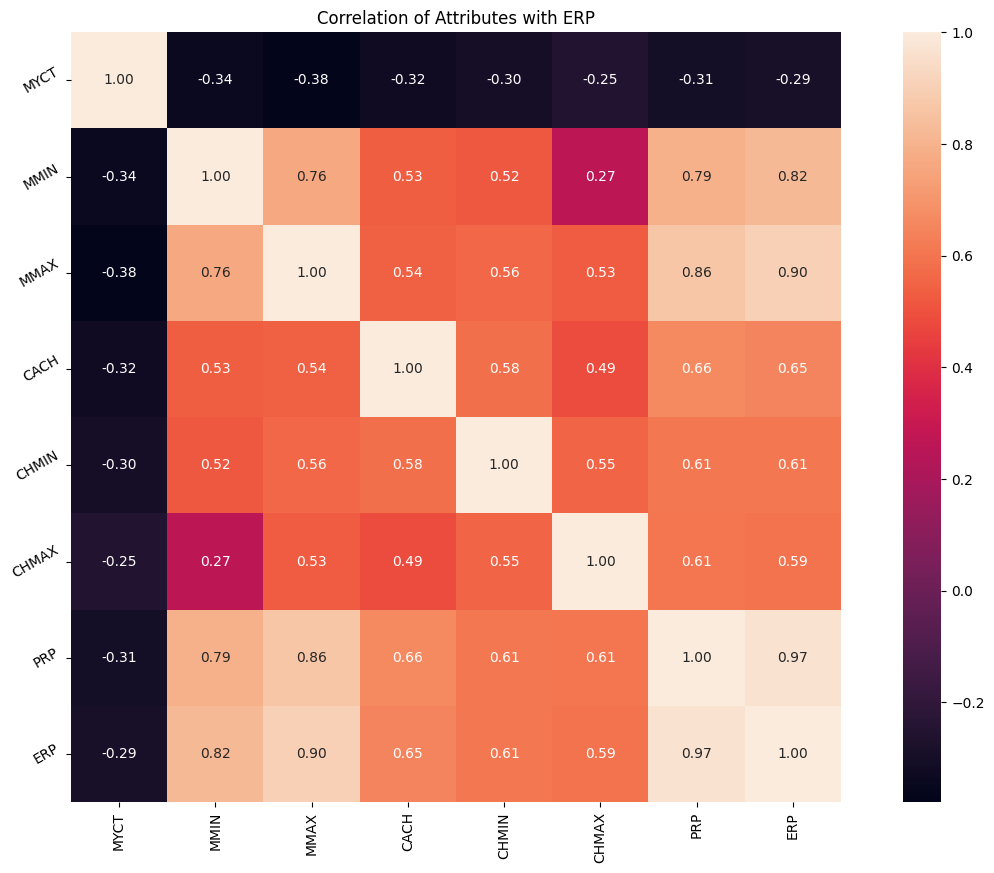

In [96]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with ERP')
corr_map = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
corr_map.set_xticklabels(corr_map.get_xticklabels(), rotation=90)
corr_map.set_yticklabels(corr_map.get_yticklabels(), rotation=30)
plt.show()

In [97]:
df.isnull().sum()

,0
Vendor Name,0
Model Name,0
MYCT,0
MMIN,0
MMAX,0
CACH,0
CHMIN,0
CHMAX,0
PRP,0
ERP,0


In [98]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000,209.0000
mean,203.8230,"2,867.9809","11,796.1531",25.2057,4.6986,18.2679,105.6220,99.3301
std,260.2629,"3,878.7428","11,726.5644",40.6287,6.8163,25.9973,160.8307,154.7571
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000,6.0000,15.0000
25%,50.0000,768.0000,"4,000.0000",0.0000,1.0000,5.0000,27.0000,28.0000
50%,110.0000,"2,000.0000","8,000.0000",8.0000,2.0000,8.0000,50.0000,45.0000
75%,225.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000,113.0000,101.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000,"1,150.0000","1,238.0000"


In [101]:
for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    print(df[var].value_counts() / np.float64(len(df)))

MYCT
50     0.1196
140    0.0431
300    0.0383
26     0.0383
320    0.0335
56     0.0335
180    0.0335
38     0.0335
105    0.0287
75     0.0287
200    0.0287
800    0.0287
900    0.0239
160    0.0239
143    0.0239
25     0.0191
400    0.0191
29     0.0191
23     0.0191
60     0.0191
110    0.0191
480    0.0144
92     0.0144
100    0.0144
330    0.0144
115    0.0144
125    0.0144
30     0.0144
225    0.0144
250    0.0144
240    0.0096
17     0.0096
72     0.0096
1500   0.0096
810    0.0096
133    0.0096
700    0.0096
59     0.0096
40     0.0096
1100   0.0096
57     0.0096
167    0.0048
350    0.0048
64     0.0048
175    0.0048
90     0.0048
220    0.0048
600    0.0048
150    0.0048
185    0.0048
203    0.0048
48     0.0048
84     0.0048
112    0.0048
35     0.0048
52     0.0048
70     0.0048
116    0.0048
124    0.0048
98     0.0048
Name: count, dtype: float64
MMIN
2000    0.2584
1000    0.1818
512     0.1053
4000    0.1053
8000    0.0957
256     0.0622
768     0.0478
16000   0.0335
31

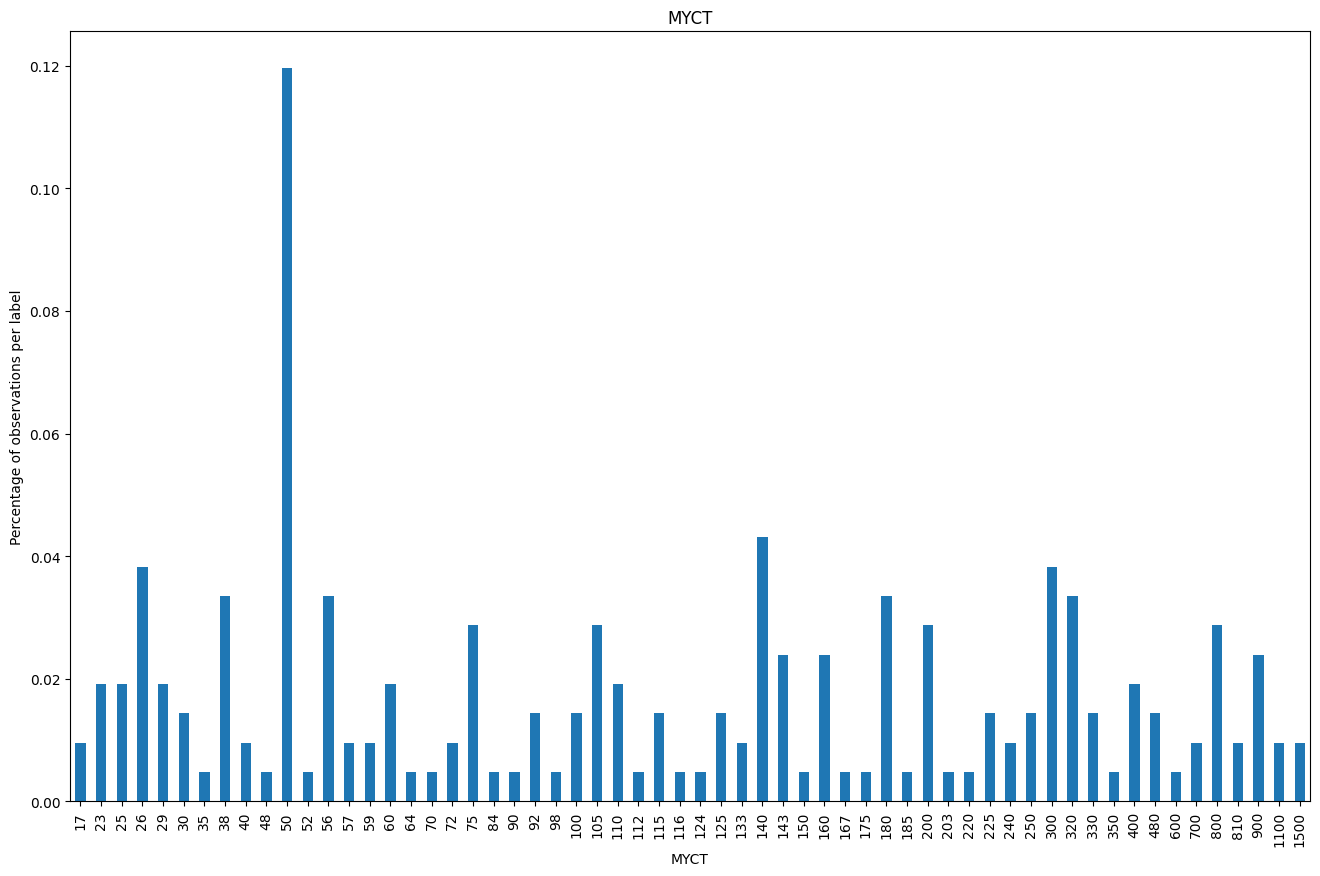

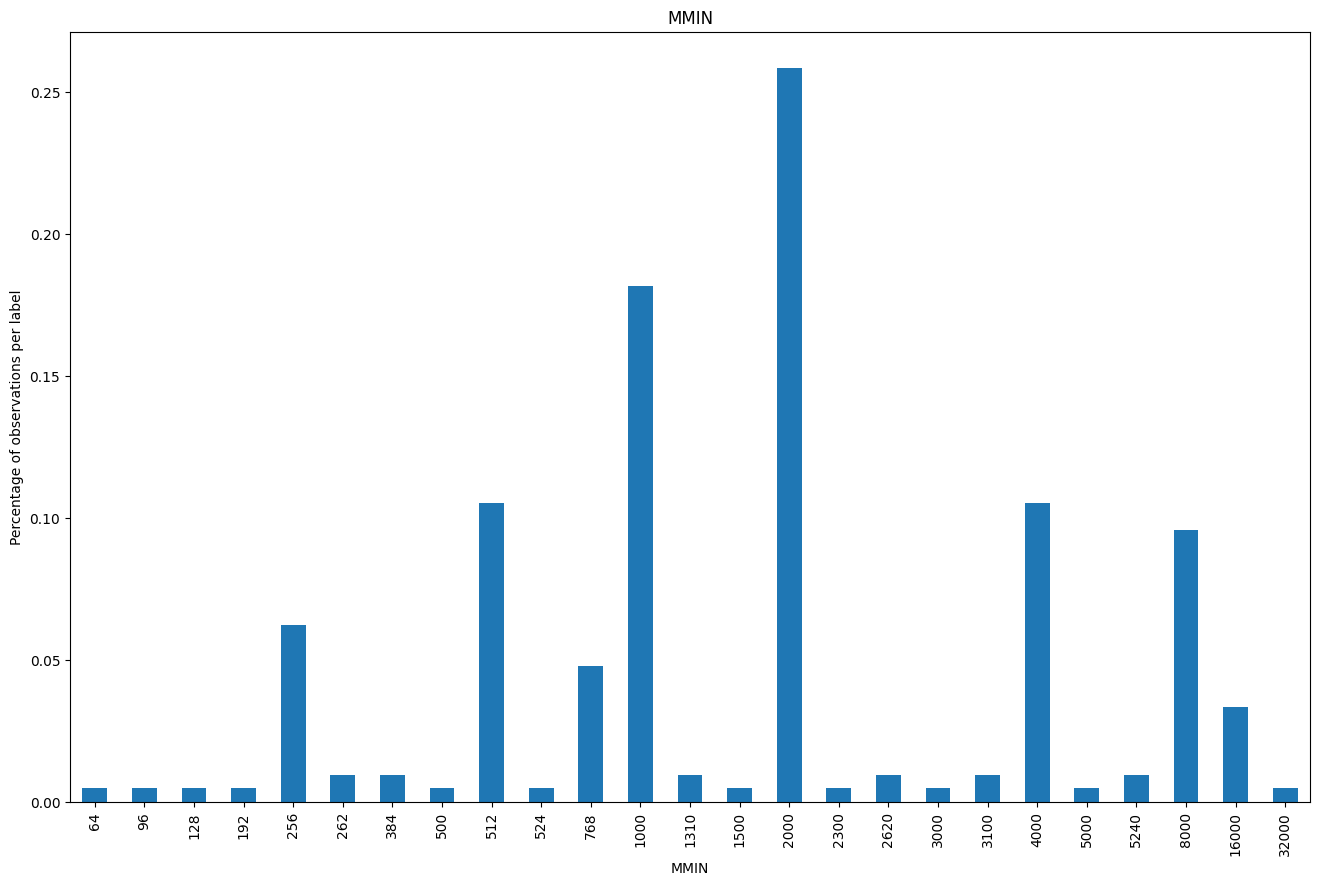

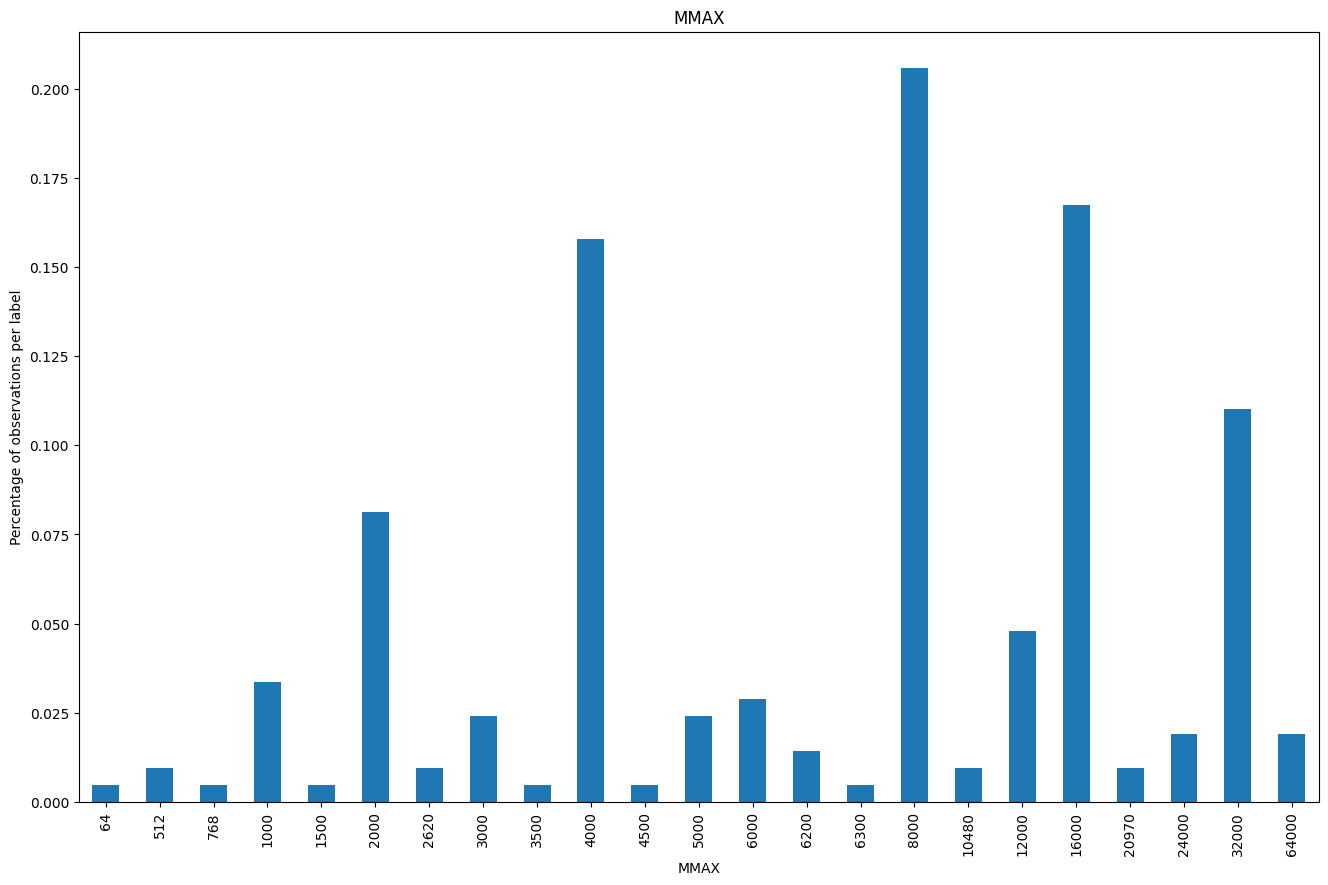

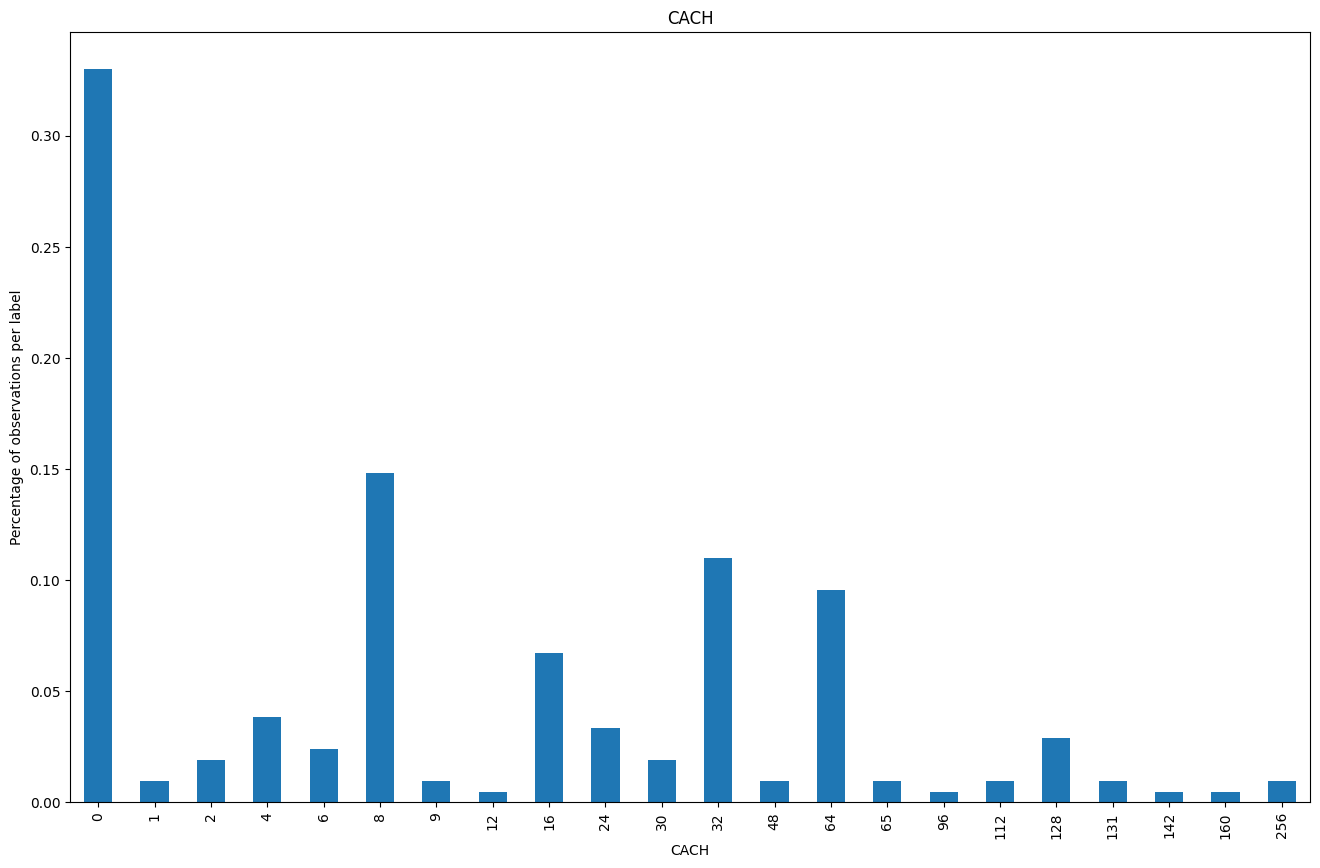

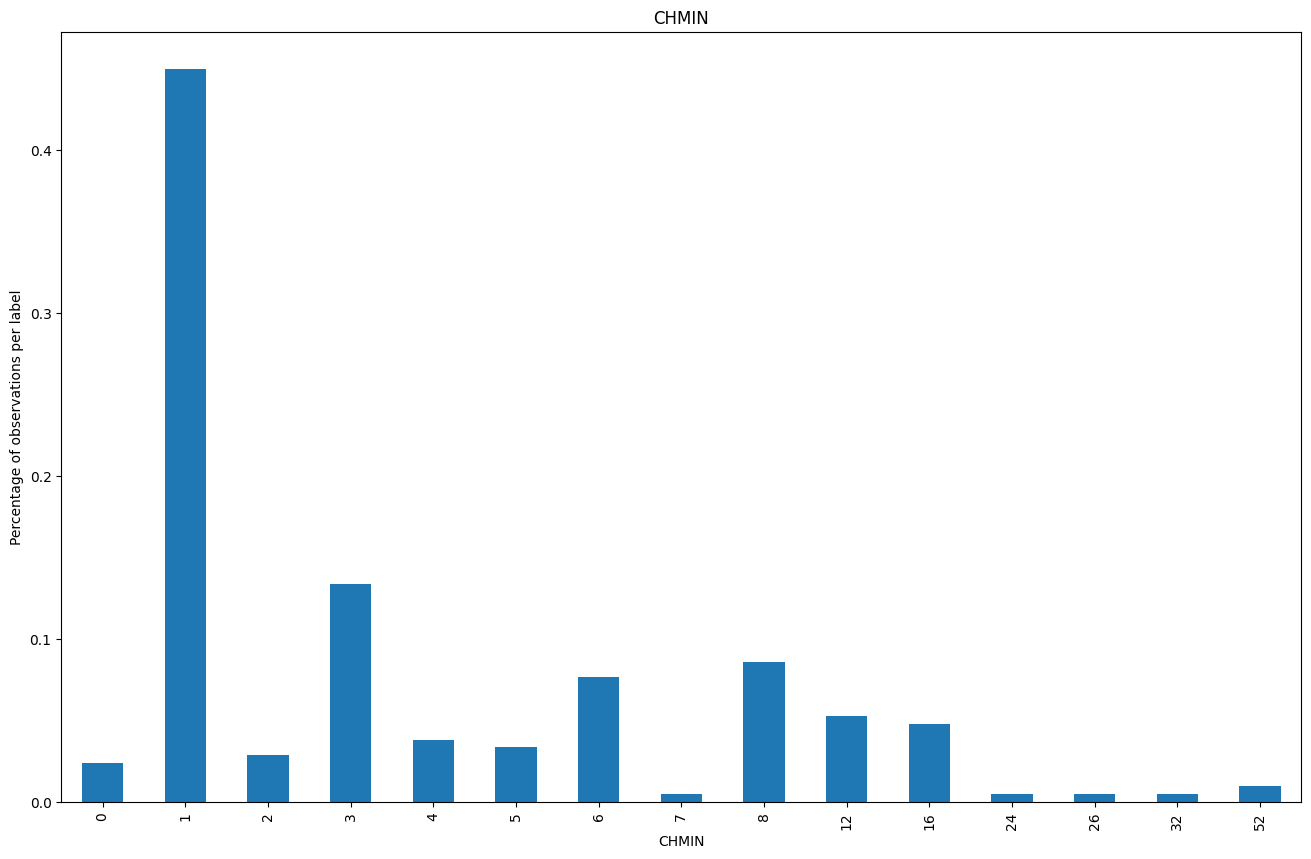

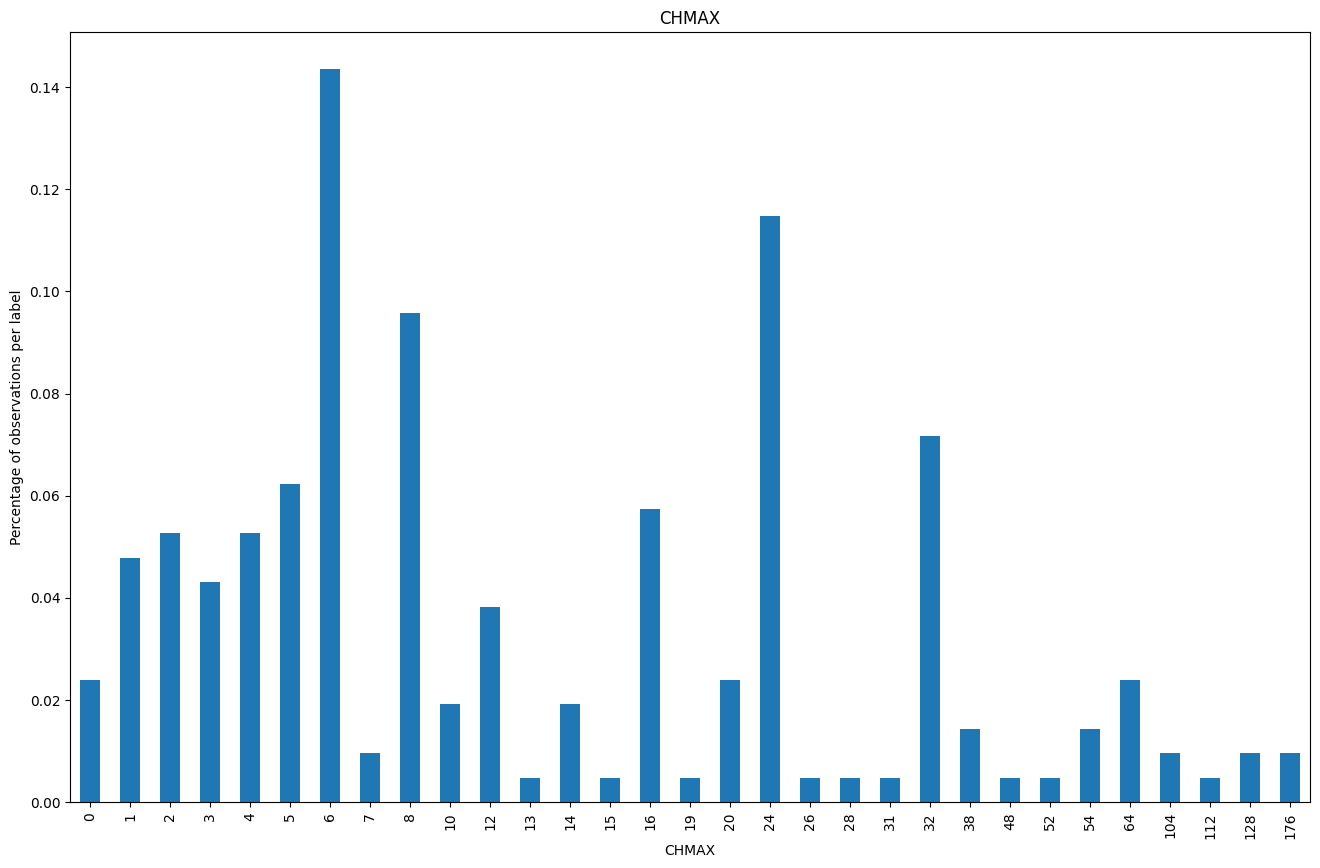

In [102]:
for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float64(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

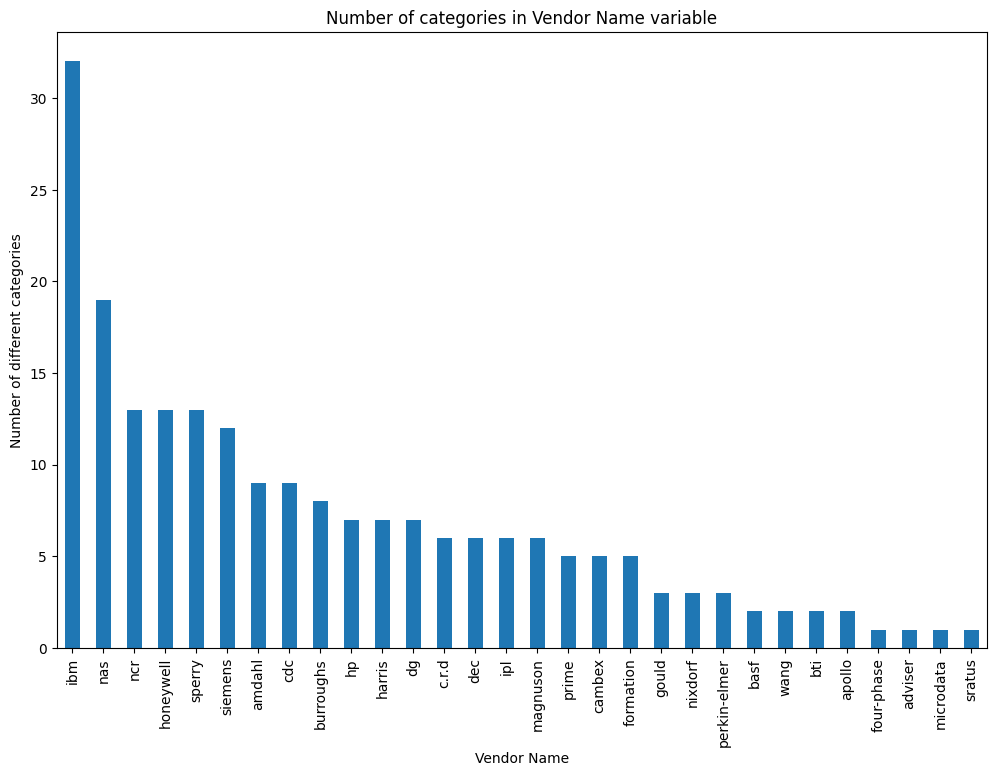

In [103]:
plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()

#**Linear Regression Modelling**

In [104]:
df

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [110]:
print(df.iloc[:,:2])
df_cat = df.iloc[:,:2]
print("\n\n")
print(df.iloc[:, 2:])
df_num = df.iloc[:,2:]

    Vendor Name     Model Name
0       adviser          32/60
1        amdahl         470v/7
2        amdahl        470v/7a
3        amdahl        470v/7b
4        amdahl        470v/7c
..          ...            ...
204      sperry           80/8
205      sperry  90/80-model-3
206      sratus             32
207        wang         vs-100
208        wang          vs-90

[209 rows x 2 columns]



     MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0     125   256   6000   256     16    128  198  199
1      29  8000  32000    32      8     32  269  253
2      29  8000  32000    32      8     32  220  253
3      29  8000  32000    32      8     32  172  253
4      29  8000  16000    32      8     16  132  132
..    ...   ...    ...   ...    ...    ...  ...  ...
204   124  1000   8000     0      1      8   42   37
205    98  1000   8000    32      2      8   46   50
206   125  2000   8000     0      2     14   52   41
207   480   512   8000    32      0      0   67   47
208   480  1000   

In [111]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [113]:
X_train.shape, y_train.shape


((146, 6), (146,))

In [114]:
X_test.shape, y_test.shape


((63, 6), (63,))

In [115]:
X_train.head()


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
61,800,256,8000,0,1,4
24,320,128,6000,0,1,12
30,25,1310,2620,131,12,24
60,800,256,8000,0,1,4
56,220,1000,8000,16,1,2


In [116]:
X_train.describe()


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
count,146.0000,146.0000,146.0000,146.0000,146.0000,146.0000
mean,205.8082,"2,799.9726","11,741.2055",25.5685,4.5479,19.2397
std,249.6152,"3,865.5077","11,879.6456",41.6903,6.5770,28.8810
min,17.0000,64.0000,64.0000,0.0000,0.0000,0.0000
25%,50.0000,512.0000,"4,000.0000",0.0000,1.0000,5.0000
50%,115.5000,"2,000.0000","8,000.0000",8.0000,1.5000,8.0000
75%,240.0000,"4,000.0000","16,000.0000",32.0000,6.0000,24.0000
max,"1,500.0000","32,000.0000","64,000.0000",256.0000,52.0000,176.0000


In [117]:
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)

In [118]:
# fit the linear regression model

# import the LinearRegression class from linear_model library
from sklearn.linear_model import LinearRegression

# instantiate an object lr
lr = LinearRegression()


# Train the model using the training sets
lr.fit(X_train, y_train)

LinearRegression()

In [119]:
# Predict on the test data set
y_pred = lr.predict(X_test)

In [120]:
lr.predict(X_test)[0:5]


array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392])

In [121]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 6
Estimated coefficients: [17.70202595 59.11241774 78.35042681 16.53981449 -0.35410978 38.97256261]
Estimated intercept: 100.0


In [122]:
dataset = list(zip(pd.DataFrame(X_train).columns, lr.coef_))

pd.DataFrame(data = dataset, columns = ['Features', 'Estimated Coefficients']).set_index('Features')

,Estimated Coefficients
Features,
0,17.7020
1,59.1124
2,78.3504
3,16.5398
4,-0.3541
5,38.9726


In [123]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 37.99


In [124]:
# R2 Score

from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.92


In [125]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))


Training set score: 0.91


In [126]:
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Test set score: 0.92


In [127]:
# import the library
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)

In [128]:
print(cv_scores.round(4))


[ 0.8484 -0.864   0.7149  0.8755  0.7707]


In [129]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))


Average 5-Fold CV Score: 0.4691


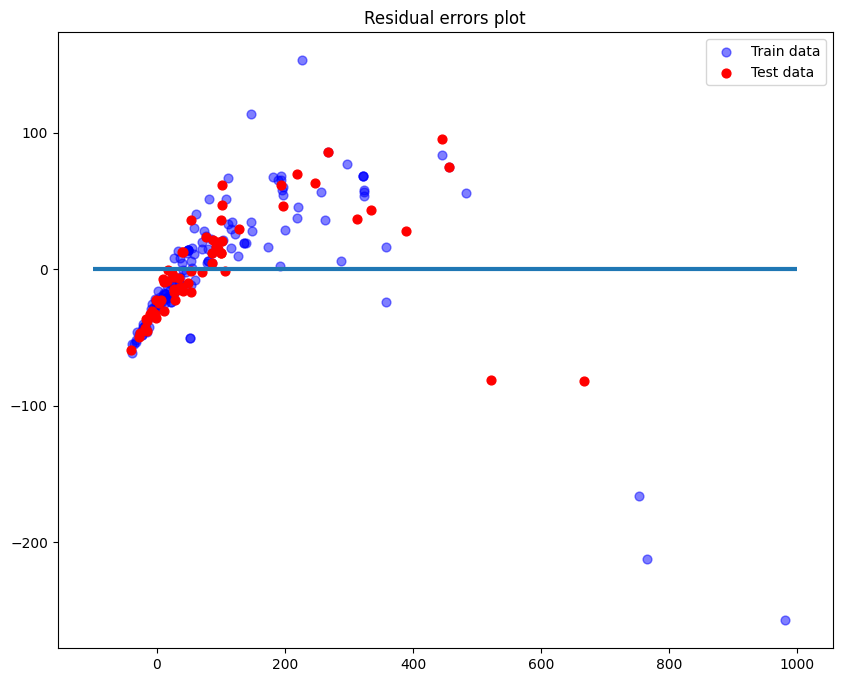

In [130]:
# Plot for residual error

# adjust the figure size
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

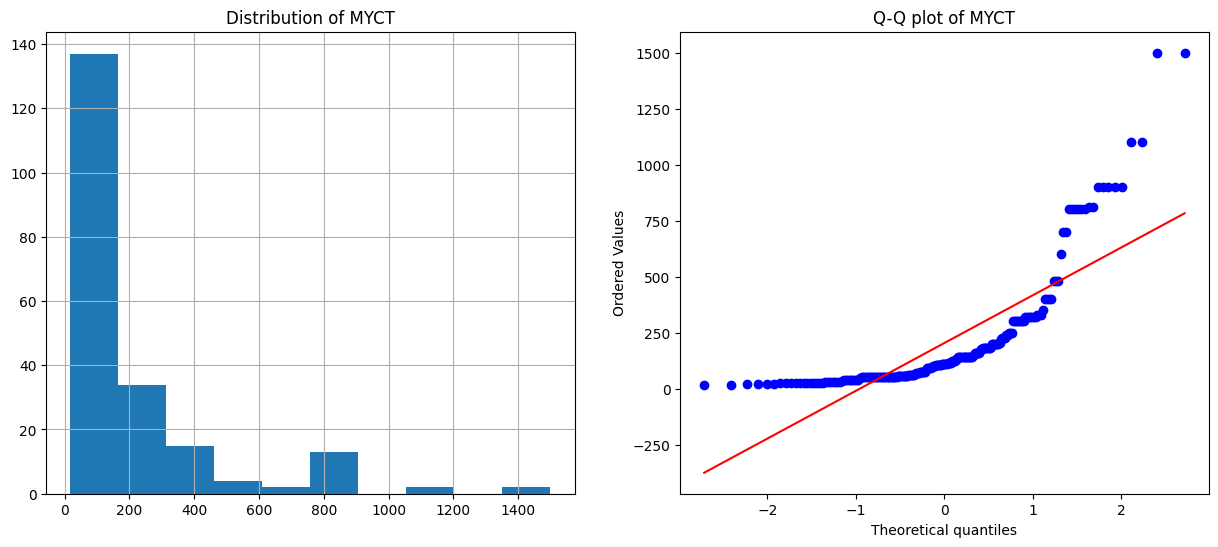

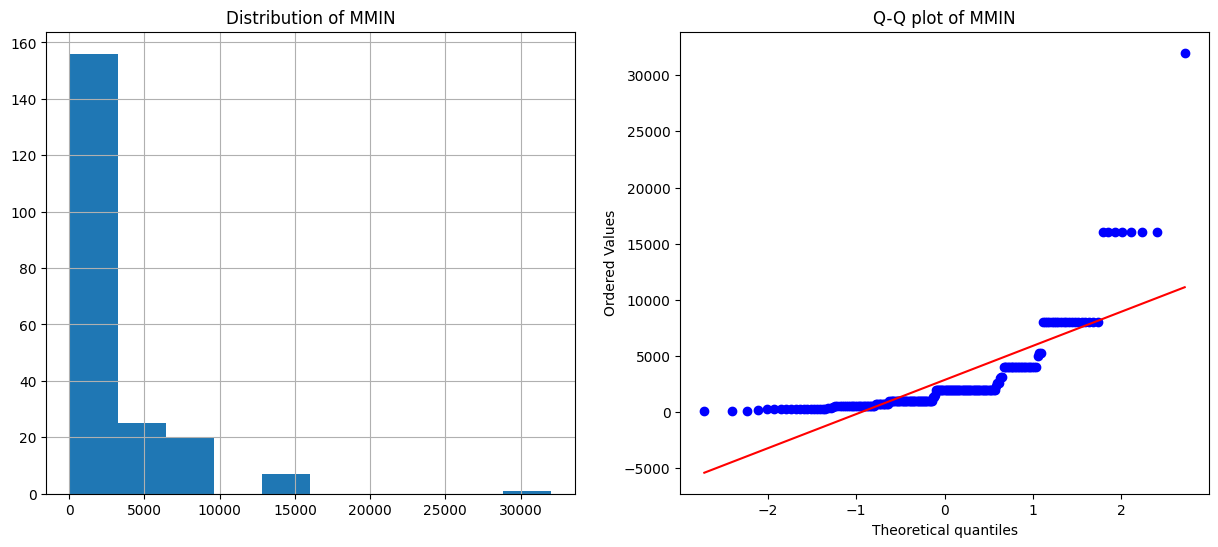

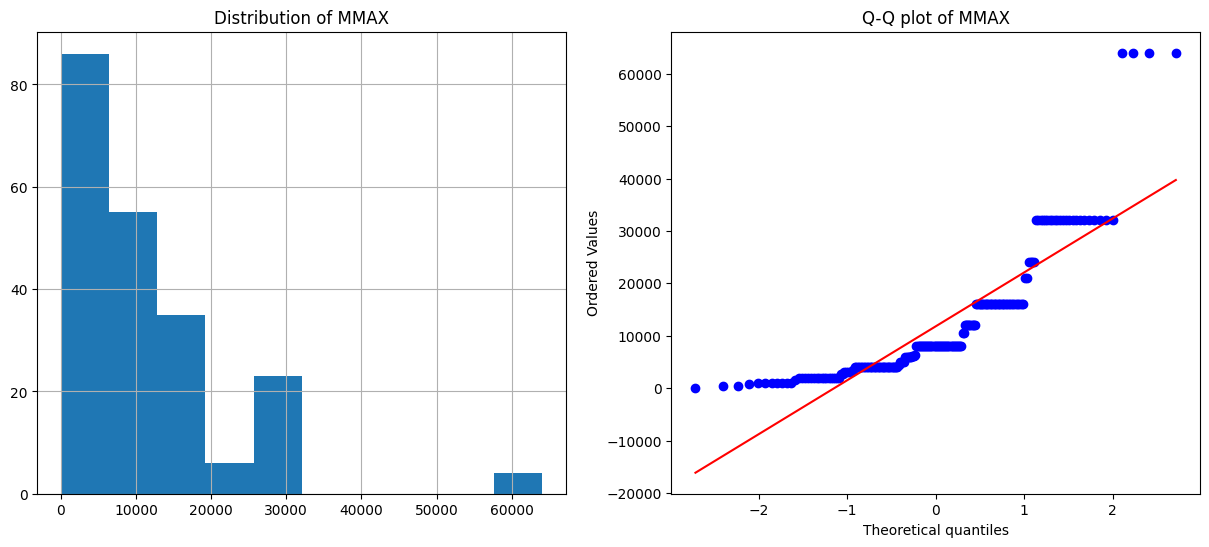

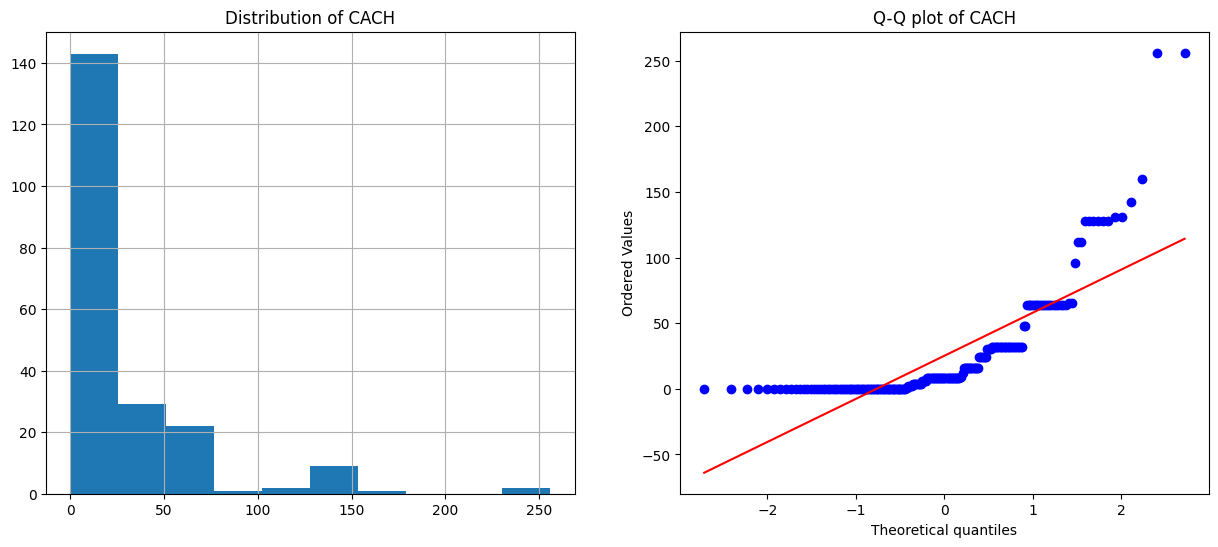

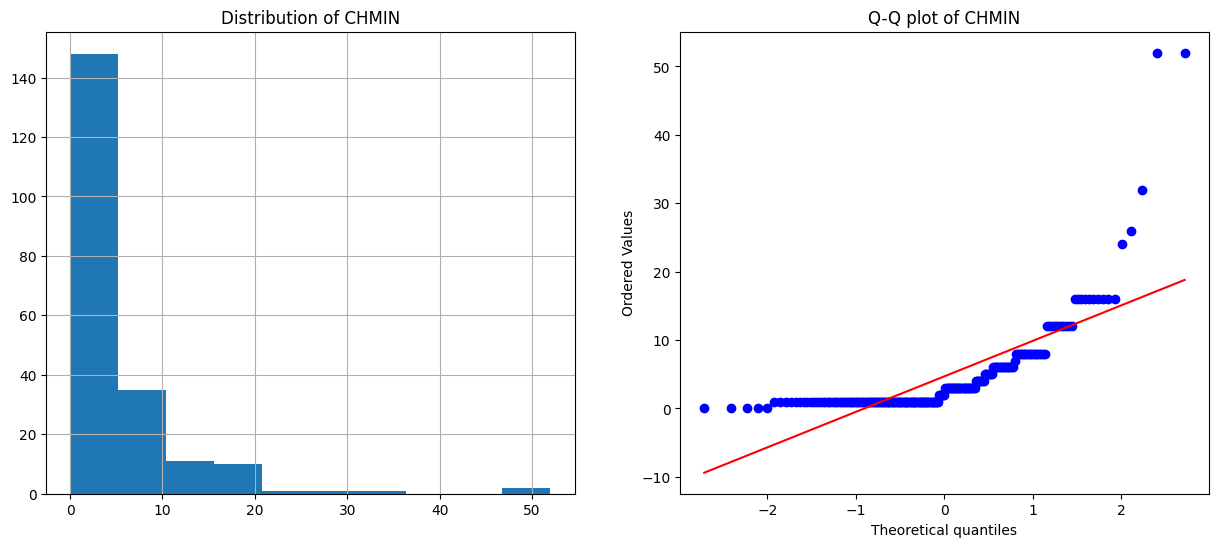

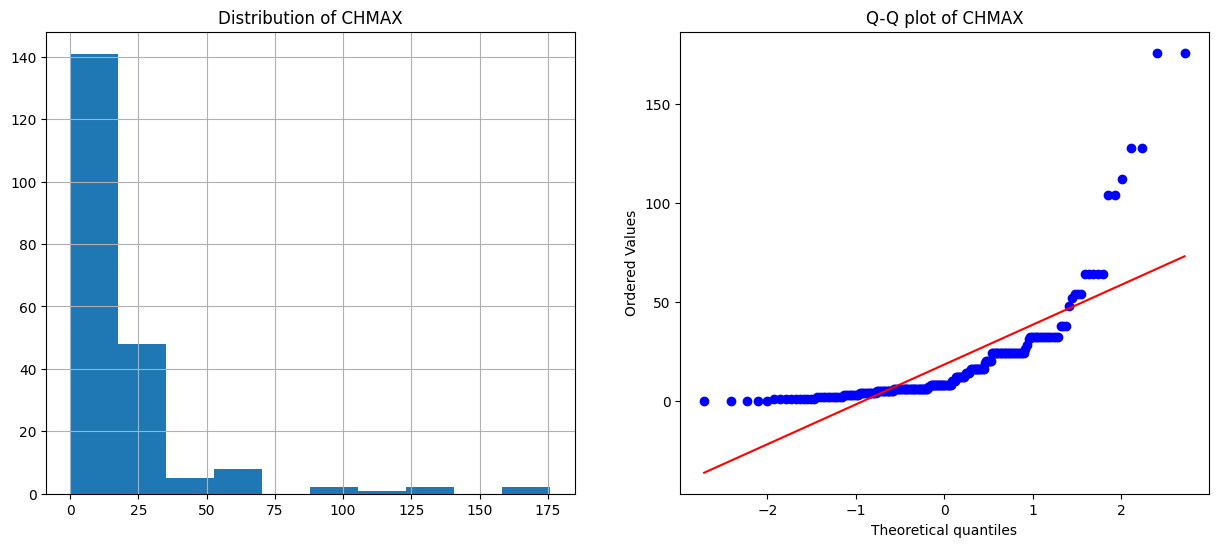

In [131]:
# plotting the Q-Q plot

import pylab
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:

    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show()


    I carry out residual analysis to check for homoscedasticity assumption. Residual errors plot show that the data is randomly scattered around line zero. The plot does not display any pattern in the residuals. Hence, we can conclude that the Linear Regression model is a good fit to the data.

    The r-squared or the coefficient of determination is 0.4691 on an average for 5-fold cross validation. It means that the predictor is only able to explain 46.91% of the variance in the target variable. This indicates that the model is not a good fit to the data.

    I carry out normality test to check for distribution of the variables. We can see that the variables do not follow the normal distribution. The Q-Q plots confirm the same.

    So, we can conclude that the linear regression model is unable to model the data to generate decent results. It should be noted that the model is performing equally on both training and testing datasets. It seems like a case where we would need to model this data using methods that can model non-linear relationships. Also variables need to be transformed to satisfy the normality assumption.